In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


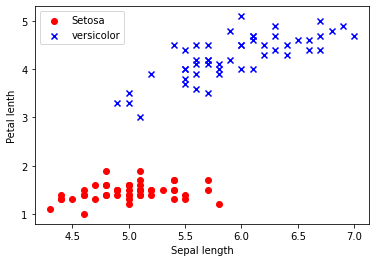

In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:, 0], X[50:, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("Sepal length")
plt.ylabel("Petal lenth")
plt.legend(loc="upper left")
plt.show()

## Adaline GD

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

In [9]:
import AdalineGD

from importlib import reload 	
AdalineGD = reload(AdalineGD)	# reload of my_module 
from AdalineGD import *

plot the cost against the number of epochs for the two different learning rates:

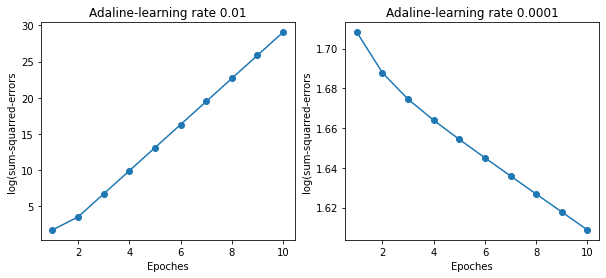

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker ="o")
ax[0].set_xlabel("Epoches")
ax[0].set_ylabel("log(sum-squarred-errors")
ax[0].set_title("Adaline-learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker ="o")
ax[1].set_xlabel("Epoches")
ax[1].set_ylabel("log(sum-squarred-errors")
ax[1].set_title("Adaline-learning rate 0.0001")

plt.show()

Apply standardization to improve the performanace of the Gradient Descent   

In [20]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

C:\Users\promar\AppData\Local\Temp\ipykernel_6248\3918790428.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8,


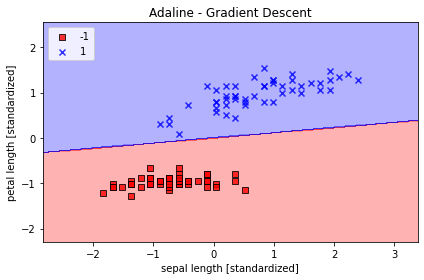

In [21]:
ada_gd = AdalineGD(n_iter=15,eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_region(X_std, y, ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

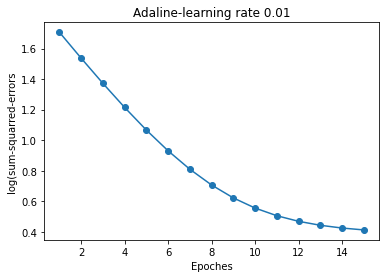

In [22]:
plt.plot(range(1, len(ada_gd.cost_)+1), np.log10(ada_gd.cost_), marker ="o")
plt.xlabel("Epoches")
plt.ylabel("log(sum-squarred-errors")
plt.title("Adaline-learning rate 0.01")

plt.show()

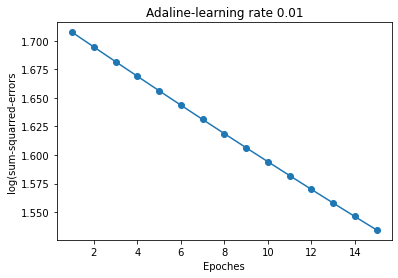

In [23]:
ada_gd = AdalineGD(n_iter=15,eta=0.0001)
ada_gd.fit(X_std, y)
plt.plot(range(1, len(ada_gd.cost_)+1), np.log10(ada_gd.cost_), marker ="o")
plt.xlabel("Epoches")
plt.ylabel("log(sum-squarred-errors")
plt.title("Adaline-learning rate 0.01")

plt.show()

## Adaline SGD

In [28]:
import AdalineSGD

from importlib import reload 	
AdalineSGD = reload(AdalineSGD)	# reload of my_module 
from AdalineSGD import *

C:\Users\promar\AppData\Local\Temp\ipykernel_6248\3918790428.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8,


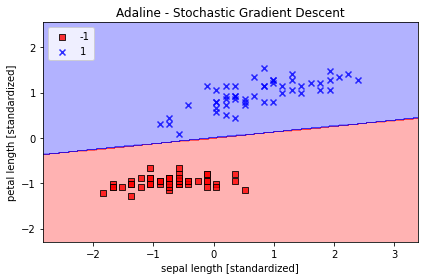

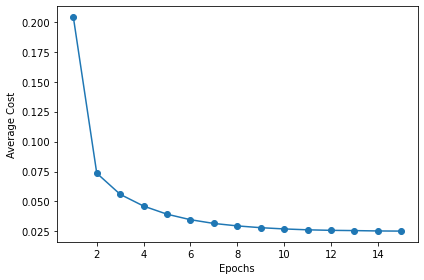

In [30]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_region(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

# KEY POINT
 * Using SGD with standardization improves performance very well.